## Unsupervised Learning
#### by **Ivan Alducin**
<p><img src="https://cdn.gritglobal.io/uploads/too-broad-customer-segmentation.jpg" width="1000"/></p>

## Segmentacion de Clientes
<p>En esté capitulo nos vamos a enfocar en entender y trabajar un caso de uso para segmentación de clientes, pero antes de eso aquí una pequeña lista de más aplicaciones que se pueden trabajar con los datos recopliados de mis clientes

- Estadística Descriptiva
- Segmentación de Clientes
- Predicción de Abandono
- Valor del Cliente a traves del tiempo (CTLV)

La segmentación la vamos a hacer con base en una metodolgía llamada <b>RFM</b>

</p>

In [39]:
# Importa Pandas, Numpy, Seaborn y Matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Importa el archivo "Online Retail.csv"
df = pd.read_csv("M30 Online Retail.csv", encoding = "ISO-8859-1")

## Análisis Exploratorio

In [40]:
# Busqueda de valores nulos con la funcion info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   INVOICE_NO    541909 non-null  object 
 1   STOCK_CODE    541909 non-null  object 
 2   DESCRIPTION   540455 non-null  object 
 3   QUANTITY      541909 non-null  int64  
 4   INVOICE_DATE  541909 non-null  object 
 5   UNIT_PRICE    541909 non-null  float64
 6   CUSTOMER_ID   406829 non-null  float64
 7   REGION        541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [41]:
# eliminar valores nulos
df = df.dropna()
# Busqueda de valores nulos con la funcion info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   INVOICE_NO    406829 non-null  object 
 1   STOCK_CODE    406829 non-null  object 
 2   DESCRIPTION   406829 non-null  object 
 3   QUANTITY      406829 non-null  int64  
 4   INVOICE_DATE  406829 non-null  object 
 5   UNIT_PRICE    406829 non-null  float64
 6   CUSTOMER_ID   406829 non-null  float64
 7   REGION        406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [42]:
# visualizar los primeros 20 registros del dataframe
df.head(20)

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2019 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2019 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2019 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2019 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2019 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01/12/2019 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01/12/2019 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01/12/2019 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01/12/2019 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01/12/2019 08:34,1.69,13047.0,United Kingdom


## Recency
<p>Indicador que nos dice que tan reciente es la compra de un cliente</p>

In [47]:
# Obtener los clientes unicos
customer = df['CUSTOMER_ID'].unique()
# Convertir customer a un DataFrame
customer_df = pd.DataFrame(customer, columns=['CUSTOMER_ID'])

In [48]:
# Obtener la última fecha de compra por cliente
# Convertir la columna INVOICE_DATE a formato datetime con el formato correcto y dayfirst=True
df['INVOICE_DATE'] = pd.to_datetime(df['INVOICE_DATE'], format="%d/%m/%Y %H:%M", dayfirst=True)
max_purchase = df.groupby('CUSTOMER_ID').INVOICE_DATE.max().reset_index()

In [49]:
# Vamos a calcular nuestra metrica de Recency, esto lo haremos restando los días de la última fecha de compra a cada observacón
reference_date = df['INVOICE_DATE'].max()  
max_purchase['RECENCY'] = (reference_date - max_purchase['INVOICE_DATE']).dt.days

In [51]:
# Unir el DataFrame de clientes únicos con el que acabamos de crear de la última fecha de compra
customer1 = pd.merge(customer_df, max_purchase[['CUSTOMER_ID', 'RECENCY']], on='CUSTOMER_ID')

(array([424., 202., 302.,  84., 236., 180., 151., 116., 138., 100.,  91.,
         88.,  55., 132.,  62.,  77.,  88.,  70.,  69.,  69.,  59.,  45.,
         49.,  31.,  33.,  33.,  25.,  13.,  50.,  23.,  24.,  27.,  24.,
         24.,  20.,  25.,  22.,  23.,  15.,  23.,  25.,  36.,  10.,  22.,
         19.,  34.,  15.,  25.,  16.,  26.,  27.,  15.,  25.,  13.,  23.,
          9.,  32.,  11.,  31.,   8.,  14.,   6.,  30.,  23.,  17.,  20.,
         13.,  25.,  12.,  23.,  21.,  29.,  12.,  19.,  16.,  20.,   4.,
         21.,   8.,  14.,  15.,  15.,  13.,  25.,   9.,  19.,  15.,   9.,
         12.,  13.,   8.,   0.,   0.,   1.,  12.,  16.,  16.,  27.,  16.,
         40.]),
 array([  0.  ,   3.74,   7.48,  11.22,  14.96,  18.7 ,  22.44,  26.18,
         29.92,  33.66,  37.4 ,  41.14,  44.88,  48.62,  52.36,  56.1 ,
         59.84,  63.58,  67.32,  71.06,  74.8 ,  78.54,  82.28,  86.02,
         89.76,  93.5 ,  97.24, 100.98, 104.72, 108.46, 112.2 , 115.94,
        119.68, 123.42, 127.16

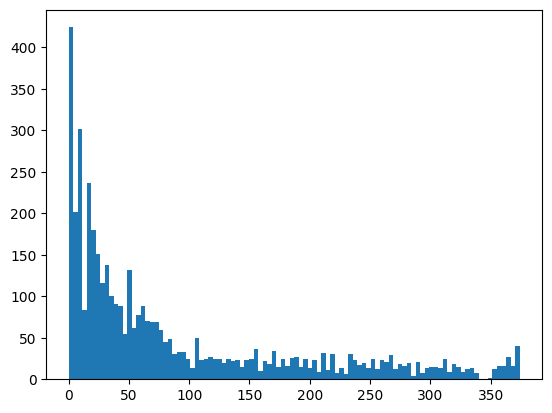

In [55]:
# Grafica un histograma de Recency
plt.hist(customer1['RECENCY'], bins=100)

In [ ]:
# Imprime la Estadística de Resumen para Recency
____

## Frequency
<p>Frecuencia con la que un cliente compra uno o más productos</p>

In [ ]:
# Obtener el número de compras por cliente
frequency = ____

In [ ]:
# Unir el DataFrame que acabamos de crear con el de los clientes unicos
customer = ____

In [ ]:
# Grafica un histograma de Frequency
____

In [ ]:
# Imprime la Estadística de Resumen para Frequency
____

## Monetary
<p>Valor del monto total que ha gastado un cliente en la compra de mis productos</p>

In [ ]:
# Calcular el monto total por cada compra
df['MONETARY'] = ____ * ____

# Obtener el valor monetario de compra por cliente
monetary = ____

In [ ]:
# Unir el DataFrame que acabamos de crear con el de los clientes unicos
customer = ____

In [ ]:
# Grafica un histograma de Monetary
____

In [ ]:
# Imprime la Estadística de Resumen para Monetary
____

## Algoritmo k-Means
<p>Ya creamos nuestros indicadores principales de la metodología RFM. es hora de hacer <i>Machine Learning</i>. Para ello utilizaremos un algoritmo no supervisado llamado <b>k-Means</b></p>
<p><img src="https://miro.medium.com/max/818/1*fG8u8nV7qR91wDyFDEEV-g.png" width="250"/></p>

In [ ]:
# Funcion para ordenar los clusters
def order_cluster(cluster_field_name, target_field_name, df, ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

## Elbow Method
<p>¿Cual es mi número óptimo de clusters? Vamos a contruir una <i>gráfica de codo</i> para averiguarlo</p>

In [ ]:
# Importa la librería de kMeans
____

In [ ]:
# Configuración inicial - Vamos a tomar como referencia el indicador de Recency
sse={}
recency = ____

for k in range(1, 10):
    # Instancia el algoritmo de k-means iterando sobre k
    kmeans = ____
    
    # Entrena el algoritmo
    ____
    
    # Adjunta las etiquetas
    recency["clusters"] = ____
    
    # Adunta la inercia o variación al arreglo sse
    sse[k] = ____
    
# Grafico de codo (Elbow)
plt.figure(figsize=(12,8))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [ ]:
# Instanciar el algoritmo con 4 clusters para Recency 
kmeans = ____

# Entrenar el algoritmo
____

# Obtener las predicciones
customer['RECENCY_CLUSTER'] = ____

# Ordenar los clusters
customer = order_cluster('RECENCY_CLUSTER', 'RECENCY', customer, False)

# Estadística Descriptiva del cluster creado
customer.groupby(____)[____].____()

In [ ]:
# Instanciar el algoritmo con 4 clusters para Frequency 
kmeans = ____

# Entrenar el algoritmo
____

# Obtener las predicciones
customer['FREQUENCY_CLUSTER'] = ____

# Ordenar los clusters
customer = order_cluster('FREQUENCY_CLUSTER', 'FREQUENCY', customer, True)

# Estadística Descriptiva de los clusters
____

In [ ]:
# Instanciar el algoritmo con 4 clusters para Monetary 
kmeans = ____

# Entrenar el algoritmo
____

# Obtener las predicciones
customer['MONETARY_CLUSTER'] = ____

# Ordenar los clusters ¿Como tienes que ordenar el cluster?
customer = ____

# Estadística Descriptiva de los clusters
____

## Score de Segmentación
<p>El algoritmo de k-means nos da una segmentación generalizada, pero podemos personalizarla aún más creando una métrica que asigne una calificación al valor del cluster. Esto es lo que vamos a hacer!!</p>

In [ ]:
# Vamos a crear nuestro score sumando el valor de cada uno de los clusters
customer['SCORE'] = ____ + ____ + ____

# Obtener el promedio para cada una de las métricas de las calificaciones creadas (Score)
____.mean()

In [ ]:
# Crea una funcion que asigne lo siguiente: 
# Si score <= 1 entonces 'Low-Value', si score >1 y <=4 entonces 'Average', si score >4 y <=6 entonces 'Potential', por último si score >6 entonces 'High-Value'
def segment(score):







# Crear una columna aplicando esta función al campo 'SCORE'
customer['SEGMENT'] = ____

In [ ]:
# Vamos a dar un vistazo a la tabla final
customer.head()

In [ ]:
# Imprime la proporción o el total de clientes por segmento
____

In [ ]:
# Define un estilo 'bmh'
____

# Filtra los valores para RECENCY < 4000
____

# Crea un grafico de dispersion de 'MONETARY' VS 'RECENCY' por Segmento
____






In [ ]:
# Crea un grafico de dispersion de 'MONETARY' vs 'FREQUENCY' vs  por Segmento
____



